In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hdbscan

from lib.vector_io import read_fvecs
from lib.paths import DATA_DIR, IMAGES_DIR

In [3]:
# Load the SIFT vectors
sift_vectors = read_fvecs(DATA_DIR / "siftsmall_base.fvecs")

In [4]:
# Run HDBSCAN clustering in high-dimensional space
clusterer = hdbscan.HDBSCAN(min_cluster_size=20)  # use higher value for meaningful structure
labels = clusterer.fit_predict(sift_vectors)

/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/abhinav/git/experiments_on_hnsw/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [5]:
# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
sift_2d = pca.fit_transform(sift_vectors)

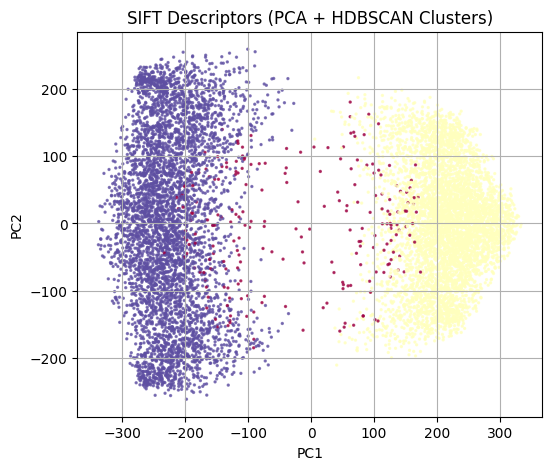

In [10]:
# Plot with cluster labels (noise labeled as -1)
plt.figure(figsize=(6, 5))
plt.scatter(sift_2d[:, 0], sift_2d[:, 1], c=labels, cmap='Spectral', s=2, alpha=0.7)
plt.title("SIFT Descriptors (PCA + HDBSCAN Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# Save the plot before showing
plt.savefig(IMAGES_DIR / "sift_hdbscan_clusters.png", bbox_inches='tight', dpi=300)
plt.show()